---
layout: page
title: Iteração
nav_order: 10
---
[<img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/fcd/blob/master/_lessons/10-Iteracao.ipynb)

# Tópico 10 – Iteração
{: .no_toc .mb-2 }

Vamos aprender sobre laços em Python e um pouco sobre como gerar dados.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Entender laços (`for`)
1. Entender a geração de números aleatórios (`np.random`)

{: .no_toc .text-delta }
Material Adaptado do [DSC10 (UCSD)](https://dsc10.com/)

<alert><font color='red'>Eu não tive tempo de mudar esses exemplos, então eles refletem a realidade da UCSD. Não da UFMG.</font></alert>

In [1]:
import pandas as pd
import numpy as np

### Agenda

- Booleanos.
- Declarações condicionais (ou seja, declarações `if`).
- Iteração (ou seja, loops `for`).

**Observação:**
- Concluímos a introdução de novas técnicas de manipulação de DataFrame.
- Hoje abordaremos algumas ferramentas básicas de programação, que serão muito relevantes à medida que começarmos a abordar mais ideias em estatística (na próxima semana).

## Booleanos

### Recapitulação: Booleanos

- `bool` é um tipo de dados em Python, assim como `int`, `float` e `str`.
- Significa "Boolean", em homenagem a George Boole, um dos primeiros matemáticos.
- Existem apenas dois valores booleanos possíveis: `True` ou `False`.
- Sim ou não.
- Ligado ou desligado.
- 1 ou 0.
- As comparações resultam em valores booleanos.

In [2]:
capstone = 'finished'
units = 123

In [3]:
units >= 180

False

In [4]:
type(units >= 180)

bool

### Operadores booleanos; `not`

Existem três operadores que nos permitem realizar aritmética com booleanos – `not`, `and` e `or`.

`not` vira `True` ↔️ `False`.

In [5]:
capstone

'finished'

In [6]:
capstone == 'finished'

True

In [7]:
not capstone == 'finished'

False

### O operador `e`

O operador `and` é colocado entre dois `bool`s. É `True` se **ambos** forem `True`; caso contrário, é `Falso`.

In [8]:
capstone

'finished'

In [9]:
units

123

In [10]:
capstone == 'finished' and units >= 180

False

In [11]:
capstone == 'finished' and units >= 120

True

### O operador `ou`

O operador `or` é colocado entre dois `bool`s. É `True` se **pelo menos um** for `True`; caso contrário, é `Falso`.

In [12]:
capstone

'finished'

In [13]:
units

123

In [14]:
capstone == 'finished' or units >= 180

True

In [15]:
# Both are True!
capstone == 'finished' or units >= 0

True

In [16]:
# Both are False!
capstone == 'not started' or units >= 180

False

### Ordem de operações

- Por padrão, a ordem das operações é `not`, `and`, `or`. Veja a _precedência_ de todos os operadores em Python [here](https://www.programiz.com/python-programming/precedence-associativity).
- Como de costume, use **`(`parênteses`)`** para tornar as expressões mais claras.

In [17]:
capstone

'finished'

In [18]:
units

123

In [19]:
capstone == 'finished' or (capstone == 'in progress' and units >= 180)

True

In [20]:
# Different meaning!
(capstone == 'finished' or capstone == 'in progress') and units >= 180

False

In [21]:
# "and" has precedence.
capstone == 'finished' or capstone == 'in progress' and units >= 180

True

### Booleanos podem ser complicados!

Por exemplo, `não (a e b)` é **diferente** de `não a e não b`! Se você estiver curioso, leia mais sobre [De Morgan's Laws](https://blog.penjee.com/what-is-demorgans-law-in-programming-answered-with-pics/).

In [22]:
capstone

'finished'

In [23]:
units

123

In [24]:
not (capstone == 'finished' and units >= 180)

True

In [25]:
(not capstone == 'finished') and (not units >= 180)

False

### Nota: `&` e `|` vs. `e` e `ou`

- Use os operadores `&` e `|` entre duas **Séries**. A aritmética será feita elemento a elemento (separadamente para cada linha).
- Isto é relevante ao escrever consultas DataFrame, por ex. `df[(df.get('capstone') == 'concluído') & (df.get('units') >= 180)]`.

- Use os operadores `and` e `or` entre dois booleanos **individuais**.
- por exemplo. `capstone == 'acabado' e unidades >= 180`.

### Verificação de conceito ✅ – Resposta em [cc.dsc10.com](http://cc.dsc10.com)

Suponha que definimos `a = True` e `b = True`. Qual é o valor da expressão a seguir?

```py
not (((not a) and b) or ((not b) or a))
```

A. `Verdade`

Por exemplo, `Falso`

C. Poderia ser qualquer um

### Além: o operador `in`

Às vezes, queremos verificar se um elemento específico está em uma lista/matriz ou se uma **substring** específica está em uma string. O operador `in` pode fazer isso por nós:

In [26]:
3 in [1, 2, 3]

True

In [27]:
'hey' in 'hey my name is'

True

In [28]:
'dog' in 'hey my name is'

False

## Condicionais

### instruções `if`

- Freqüentemente, desejaremos executar um bloco de código somente se uma expressão condicional específica for `True`.
- A sintaxe para isso é a seguinte (não esqueça dos dois pontos!):


```py
if <condition>:
    <body>
```

- O recuo é importante!

In [29]:
capstone = 'finished'
capstone

'finished'

In [30]:
if capstone == 'finished':
    print('Looks like you are ready to graduate!')

Looks like you are ready to graduate!


### `else`

`else`: Faça outra coisa se a condição especificada for `False`.

In [31]:
capstone = 'finished'
capstone

'finished'

In [32]:
if capstone == 'finished':
    print('Looks like you are ready to graduate!')
else:
    print('Before you graduate, you need to finish your capstone project.')

Looks like you are ready to graduate!


### `elif`

- E se quisermos verificar mais de uma condição? Use `elif`.
- `elif`: se a condição especificada for `False`, verifique a próxima condição.
- Se essa condição for `False`, verifique a próxima condição e assim por diante, até vermos uma condição `True`.
- Depois de ver uma condição `True`, ele avalia o código recuado e para.
- Se nenhuma das condições for `True`, o corpo `else` é executado.

In [33]:
capstone = 'in progress'
units = 123

In [34]:
if capstone == 'finished' and units >= 180:
    print('Looks like you are ready to graduate!')
elif capstone != 'finished' and units < 180:
    print('Before you graduate, you need to finish your capstone project and take', 180 - units, 'more units.')
elif units >= 180:
    print('Before you graduate, you need to finish your capstone project.')
else:
    print('Before you graduate, you need to take', 180 - units, 'more units.')

Before you graduate, you need to finish your capstone project and take 57 more units.


E se usarmos `if` em vez de `elif`?

In [35]:
if capstone == 'finished' and units >= 180:
    print('Looks like you are ready to graduate!')
if capstone != 'finished' and units < 180:
    print('Before you graduate, you need to finish your capstone project and take', 180 - units, 'more units.')
if units >= 180:
    print('Before you graduate, you need to finish your capstone project.')
else:
    print('Before you graduate, you need to take', 180 - units, 'more units.')

Before you graduate, you need to finish your capstone project and take 57 more units.
Before you graduate, you need to take 57 more units.


### Exemplo: Porcentagem para nota em letras

Abaixo, complete a implementação da função `grade_converter`, que recebe uma nota percentual (`grade`) e retorna a letra da nota correspondente, conforme tabela:

| Carta | Alcance |
| --- | --- |
| Um | [90, 100] |
| B | [80, 90) |
| C | [70, 80) |
| D | [60, 70) |
| F | [0, 60)

Sua função deve funcionar nestes exemplos:

```py
>>> grade_converter(84)
'B'

>>> grade_converter(60)
'D'
```

In [36]:
def grade_converter(grade):
    ...

In [37]:
grade_converter(84)

In [38]:
grade_converter(60)

### Atividade

```py

def mystery(a, b):
    if (a + b > 4) and (b > 0):
        return 'bear'
    elif (a * b >= 4) or (b < 0):
        return 'triton'
    else:
        return 'bruin'
```

Sem executar código:
1. O que `mystery(2, 2)` retorna?
1. Encontre entradas para que chamar `mystery` produza `'bruin'`.

In [39]:
def mystery(a, b):
    if (a + b > 4) and (b > 0):
        return 'bear'
    elif (a * b >= 4) or (b < 0):
        return 'triton'
    else:
        return 'bruin'

## Iteração

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/10-Iteracao/images/iteration.png)

### loops `for`

In [40]:
import time

print('Launching in...')

for x in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print('t-minus', x)
    time.sleep(0.5) # Pauses for half a second
    
print('Blast off! 🚀')

Launching in...
t-minus 10


t-minus 9


t-minus 8


t-minus 7


t-minus 6


t-minus 5


t-minus 4


t-minus 3


t-minus 2


t-minus 1


Blast off! 🚀


### `for`-loops

- Loops nos permitem repetir a execução do código. Existem dois tipos de loops em Python; o loop `for` é um deles.
- A sintaxe de um loop `for` é a seguinte:
```py
for <element> in <sequence>:
    <for body>
```
- Leia isto como: “para cada elemento desta sequência, repita este código”.
- Nota: listas, arrays e strings são exemplos de sequências.
- Assim como nas instruções `if`, o recuo é importante!

### Exemplo: Quadrados

In [41]:
num = 4
print(num, 'squared is', num ** 2)

num = 2
print(num, 'squared is', num ** 2)

num = 1
print(num, 'squared is', num ** 2)

num = 3
print(num, 'squared is', num ** 2)

4 squared is 16
2 squared is 4
1 squared is 1
3 squared is 9


In [42]:
# The loop variable can be anything!

list_of_numbers = [4, 2, 1, 3]

for num in list_of_numbers:
    print(num, 'squared is', num ** 2)

4 squared is 16
2 squared is 4
1 squared is 1
3 squared is 9


A linha `print(num, 'squared is', num ** 2)` é executada quatro vezes:
- Na primeira iteração, `num` é 4.
- Na segunda iteração, `num` é 2.
- Na terceira iteração, `num` é 1.
- Na quarta iteração, `num` é 3.

Isso acontece mesmo que não haja `num = ` em lugar nenhum.

### Atividade

Usando o array `colleges`, escreva um loop `for` que imprima:

```
Revelle College
John Muir College
Thurgood Marshall College
Earl Warren College
Eleanor Roosevelt College
Sixth College
Seventh College
```

<br>
<detalhes>
<summary>Clique aqui para ver a solução <b>depois</b> de tentar você mesmo.</summary>
<br>
<pré>
para faculdade em faculdades:
print(faculdade + 'Faculdade')
</pré>

</detalhes>

In [43]:
colleges = np.array(['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh'])

In [44]:
...

Ellipsis

### Gamas

- Lembre-se, cada elemento de uma lista/array possui uma posição numérica.
- A posição do primeiro elemento é 0, a posição do segundo elemento é 1, etc.
- Podemos escrever um loop `for` que acessa cada elemento em um array usando sua posição.
- `np.arange` será útil.

In [45]:
actions = np.array(['ate', 'slept', 'exercised'])
feelings = np.array(['content 🙂', 'energized 😃', 'exhausted 😩'])

In [46]:
len(actions)

3

In [47]:
for i in np.arange(len(actions)):
    print(i)

0
1
2


In [48]:
for i in np.arange(len(actions)):
    print('I', actions[i], 'and I felt', feelings[i])

I ate and I felt content 🙂
I slept and I felt energized 😃
I exercised and I felt exhausted 😩


### Exemplo: Cachinhos Dourados e os Três Ursos

Não precisamos usar a variável de loop!

In [49]:
for i in np.arange(3):
    print('🐻')
print('👧🏼')

🐻
🐻
🐻
👧🏼


### Randomização e iteração

- Nas próximas aulas, aprenderemos como **simular** eventos aleatórios, como jogar uma moeda.

- Freqüentemente, iremos:
1. Execute um experimento, por ex. "jogue 10 moedas."
2. Acompanhe algum resultado, por ex. "número de cabeças."
3. Repita as etapas 1 e 2 muitas e muitas vezes usando um loop `for`.

### Armazenando os resultados

- Para armazenar nossos resultados, normalmente usaremos um `int` ou um array.
- Se estiver usando um `int`, definimos uma variável `int` (geralmente para `0`) antes do loop, então usamos `+` para adicioná-la dentro do loop.
- Se estiver usando um array, criamos um array (geralmente vazio) antes do loop, então usamos `np.append` para adicioná-lo dentro do loop.



![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/10-Iteracao/images/append.jpg)


### `np.append`

- Esta função recebe duas entradas:
- uma matriz
- um elemento para adicionar ao final do array
- Retorna um novo array. Não modifica a matriz de entrada.
- Normalmente usamos assim para estender um array em um elemento:
`nome_do_array = np.append(nome_do_array, element_to_add)`
- ⚠️ **Lembre-se de armazenar o resultado!**

In [50]:
some_array = np.array([])

In [51]:
np.append(some_array, 'hello')

array(['hello'], dtype='<U32')

In [52]:
some_array

array([], dtype=float64)

In [53]:
# Need to save the new array!
some_array = np.append(some_array, 'hello')
some_array

array(['hello'], dtype='<U32')

In [54]:
some_array = np.append(some_array, 'there')
some_array

array(['hello', 'there'], dtype='<U32')

### Exemplo: lançamento de moeda

A função `flip(n)` lança `n` moedas justas e retorna o número de caras que viu. (Não se preocupe em como isso funciona por enquanto.)

In [55]:
def flip(n):
    '''Returns the number of heads in n simulated coin flips, using randomness.'''
    return np.random.multinomial(n, [0.5, 0.5])[0]

In [56]:
# Run this cell a few times – you'll see different results!
flip(10)

5

Vamos repetir o ato de lançar 10 moedas, 10.000 vezes.
- Cada vez, usaremos a função `flip` para lançar 10 moedas e calcular o número de caras que vimos.
- Armazenaremos esses números em um array, `heads_array`.
- Cada vez que usarmos nossa função `flip` para lançar 10 moedas, adicionaremos um elemento ao final de `heads_array`.

In [57]:
# heads_array starts empty – before the simulation, we haven't flipped any coins!
heads_array = np.array([])

for i in np.arange(10000):
    
    # Flip 10 coins and count the number of heads.
    num_heads = flip(10)
    
    # Add the number of heads seen to heads_array.
    heads_array = np.append(heads_array, num_heads)

Agora, `heads_array` contém 10.000 números, cada um correspondendo ao número de caras em 10 lançamentos de moeda simulados.

In [58]:
heads_array

array([6., 4., 8., ..., 5., 3., 4.])

In [59]:
len(heads_array)

10000

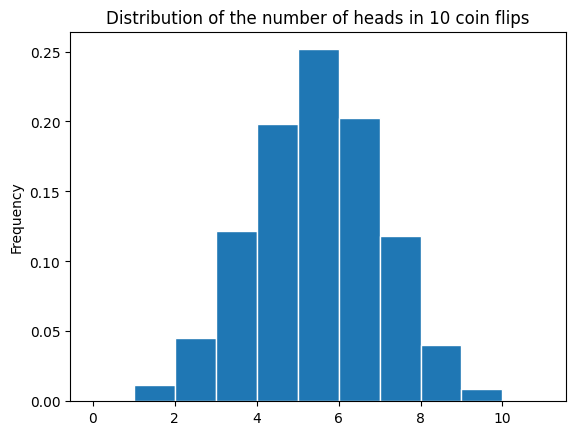

In [60]:
(pd.DataFrame().assign(num_heads=heads_array)
 .plot(kind='hist', density=True, bins=np.arange(0, 12), ec='w', legend=False, 
       title = 'Distribution of the number of heads in 10 coin flips')
);

### O padrão acumulador

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/10-Iteracao/images/accumulate.jpg)

### loops `for` no DSC 10

- Quase todos os loops `for` no DSC 10 usarão o **padrão acumulador**.
- Isso significa que inicializamos uma variável e a adicionamos repetidamente dentro de um loop.

- **Não** use loops `for` para realizar operações matemáticas em cada elemento de um array ou série.
- Em vez disso, use manipulações de DataFrame e métodos de matriz ou série integrados.

- Vídeo útil 🎥: [For Loops (and when not to use them) em DSC 10](https://www.youtube.com/watch?v=BlczSBT80fU).

### Trabalhando com strings

String são sequências, então podemos iterá-las também!

In [61]:
for letter in 'uc san diego':
    print(letter.upper())

U
C
 
S
A
N
 
D
I
E
G
O


In [62]:
'california'.count('a')

2

### Exemplo: contagem de vogais

Abaixo, complete a implementação da função `vowel_count`, que retorna o número de vogais na string de entrada `s` (incluindo repetições). Um exemplo de comportamento é mostrado abaixo.

```py
>>> vowel_count('king triton')
3

>>> vowel_count('i go to uc san diego')
8
```

In [63]:
def vowel_count(s):
    
    # We need to keep track of the number of vowels seen so far. Before we start, we've seen zero vowels.
    number = 0
    
    # For each of the 5 vowels:
       
        # Count the number of occurrences of this vowel in s.
        
        # Add this count to the variable number.
    
    # Once we've gotten through all 5 vowels, return the answer.
    

In [64]:
vowel_count('king triton')

In [65]:
vowel_count('i go to uc san diego')

## Resumo, da próxima vez

### Resumo

- As instruções `if` nos permitem executar pedaços de código dependendo se certas condições são `True`.
- `for`-loops são usados ​​para repetir a execução do código para cada elemento de uma sequência.
- Listas, arrays e strings são exemplos de sequências.